c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


                                                review  cluster
0    privacy at least put some option appear offlin...        2
1    messenger issues ever since the last update, i...        0
2    profile any time my wife or anybody has more t...        0
3    the new features suck for those of us who don'...        2
4    forced reload on uploading pic on replying com...        0
..                                                 ...      ...
886  loved it i loooooooooooooovvved it because it ...        2
887  all time legendary game the birthday party lev...        2
888  ads are way to heavy listen to the bad reviews...        2
889  fun works perfectly well. ads aren't as annoyi...        2
890  they're everywhere i see angry birds everywher...        2

[891 rows x 2 columns]
Coeficiente de Silueta: 0.03886304006591929


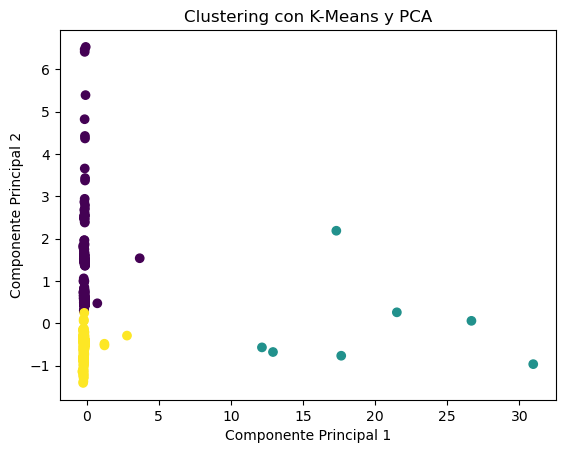

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Leer el archivo CSV y crear el DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Eliminar la columna "package_name"
df = df.drop("package_name", axis=1)

# Convertir la columna "review" a minúsculas
df["review"] = df["review"].str.strip().str.lower()

# Crear el vectorizador de texto con "english" como palabras a ignorar (stop words)
vec_model = CountVectorizer(stop_words="english")

# Vectorizar las características de texto
X_vectorized = vec_model.fit_transform(df["review"]).toarray()

# Aplicar el Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)  # Reducir a 2 dimensiones para visualización
X_pca = pca.fit_transform(X_vectorized)

# Aplicar el algoritmo K-Means sobre las componentes principales
n_clusters = 3  # Número de clusters deseados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Agregar los resultados del clustering al DataFrame
df["cluster"] = clusters

# Imprimir los resultados
print(df[["review", "cluster"]])

# Calcular el coeficiente de silueta para evaluar el clustering
silhouette_avg = silhouette_score(X_vectorized, clusters)
print("Coeficiente de Silueta:", silhouette_avg)

# Visualizar los clusters en un scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering con K-Means y PCA")
plt.show()